# Dual Doppler Analysis #

Ivan Arias

2020/01/16

In [1]:
import sys
sys.path.append('/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot')
import chivo_plot as plot
import importlib


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



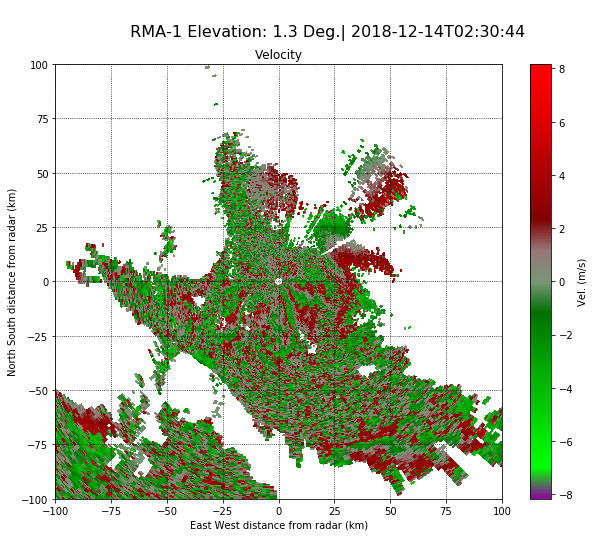

In [112]:
# RMA Check Velocity consistency for IOP 17 (2018/12/14 2 UTC)
importlib.reload(plot)

filename_rma = '/net/denali/storage/radar/RELAMPAGO/RMA1/rma1_cfrad_20181214_02/cfrad.20181214_022920.000_to_20181214_023043.922_1_SUR.nc'
#filename_rma = '/net/denali/storage/radar/RELAMPAGO/RMA1/rma1_cfrad_20181214_02/cfrad.20181214_023044.000_to_20181214_023724.950_1_SUR.nc'

fig =  plot.rma_ppi_1a_vel(filename_rma, 2)

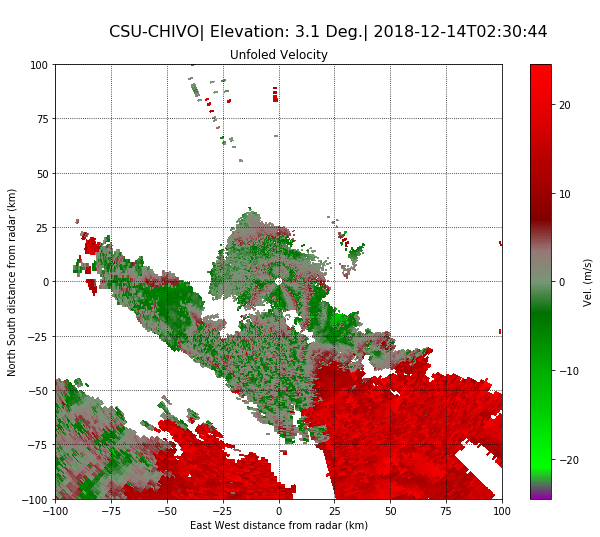

In [114]:
# Check Velocity consistency for IOP 17 (2018/12/14 2 UTC)
importlib.reload(plot)

#filename_rma = '/net/denali/storage/radar/RELAMPAGO/RMA1/rma1_cfrad_20181214_02/cfrad.20181214_022920.000_to_20181214_023043.922_1_SUR.nc'
filename_rma = '/net/denali/storage/radar/RELAMPAGO/RMA1/rma1_cfrad_20181214_02/cfrad.20181214_023044.000_to_20181214_023724.950_1_SUR.nc'

fig =  plot.rma_ppi_1a_vel_unfold(filename_rma, 5)

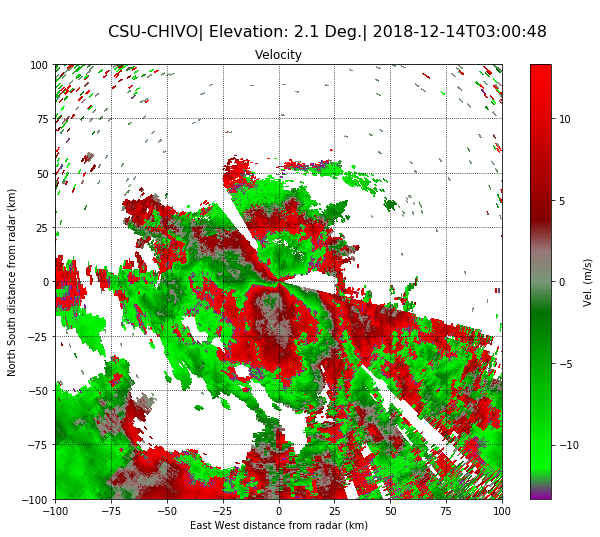

In [116]:
# Check Velocity consistency for IOP 17 (2018/12/14 2 UTC)
importlib.reload(plot)

'/net/denali/storage/radar/RELAMPAGO/quality_controlled_data/level_1a/2018/12/14/chivo.1a.20181214_023049.REL_PNL360A.nc'
filename_chivo = '/net/denali/storage/radar/RELAMPAGO/quality_controlled_data/level_1a/2018/12/14/chivo.1a.20181214_030048.REL_PNL360A.nc'

fig =  plot.chivo_ppi_1a_vel(filename_chivo, 3)


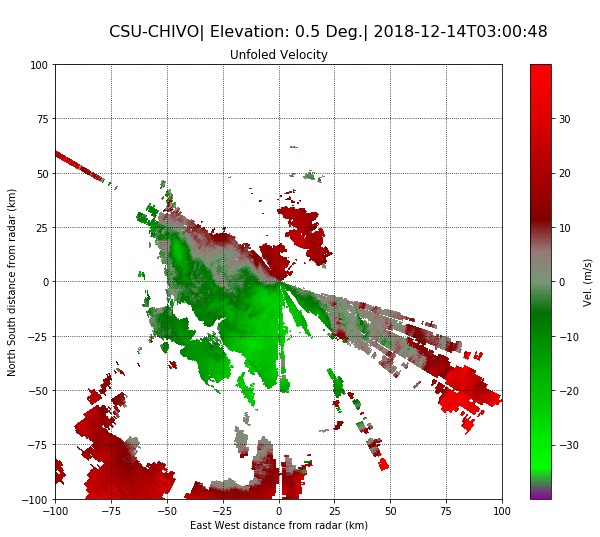

In [120]:
# Dealias Velocity

importlib.reload(plot)

'/net/denali/storage/radar/RELAMPAGO/quality_controlled_data/level_1a/2018/12/14/chivo.1a.20181214_023049.REL_PNL360A.nc'
filename_chivo = '/net/denali/storage/radar/RELAMPAGO/quality_controlled_data/level_1a/2018/12/14/chivo.1a.20181214_030048.REL_PNL360A.nc'

fig =  plot.chivo_ppi_1a_vel_unfold(filename_chivo, 0)

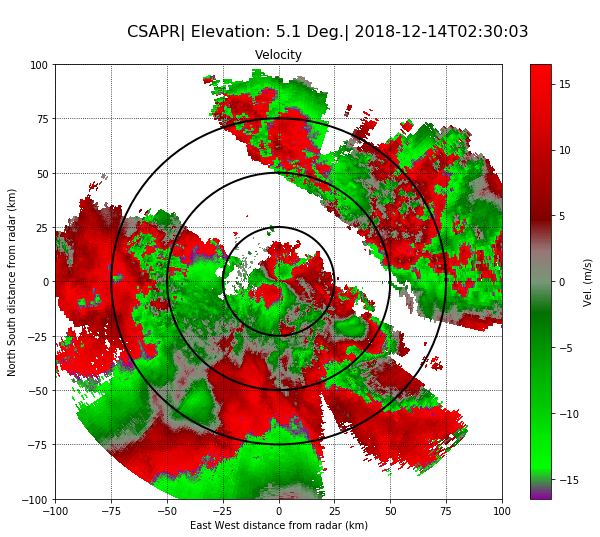

In [83]:
# Check Velocity consistency for IOP 17 (2018/12/14 2 UTC)
importlib.reload(plot)


filename_csapr = '/net/denali/storage/radar/CSAPR/DOE_b1/corcsapr2cfrppiqcM1.b1.20181214.023003.nc'

fig =  plot.csapr_ppi_1a_vel(filename_csapr,4)

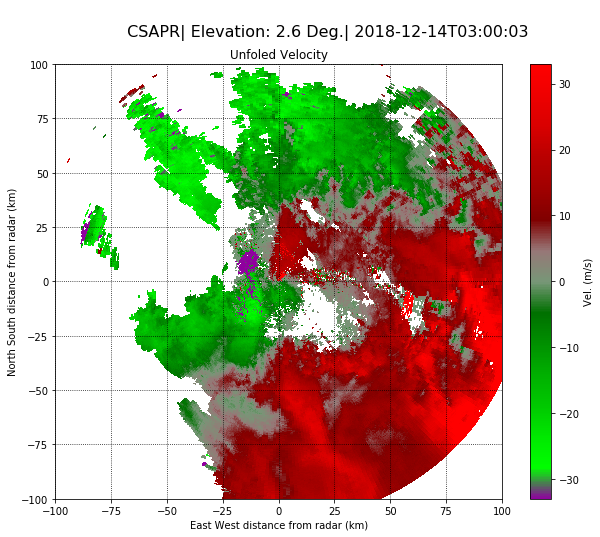

In [122]:
# Check Velocity consistency for IOP 17 (2018/12/14 2 UTC)
importlib.reload(plot)

filename_csapr = '/net/denali/storage/radar/CSAPR/DOE_b1/corcsapr2cfrppiqcM1.b1.20181214.023003.nc'
filename_csapr = '/net/denali/storage/radar/CSAPR/DOE_b1/corcsapr2cfrppiqcM1.b1.20181214.030003.nc'

fig =  plot.csapr_ppi_1a_vel_unfold(filename_csapr, 2)

In [1]:
# Import functions and read data

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time

filename_chivo = '/net/denali/storage2/radar2/tmp/Ivan/CSU/RELAMPAGO/analysis/DualRadar/rsc/chivo.1a.20181214_020047.REL_PFAR360.nc'
filename_csapr = '/net/denali/storage2/radar2/tmp/Ivan/CSU/RELAMPAGO/analysis/DualRadar/rsc/corcsapr2cfrppiM1.a1.20181214.020004.nc'

r1 = pyart.io.read(filename_chivo)
r2 = pyart.io.read(filename_csapr)
# print(r1.fields.keys(), r2.fields.keys())



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Dealias Velocity 

# CHIVO r1
gatefilter = pyart.filters.GateFilter(r1)
gatefilter.exclude_transition()
gatefilter.exclude_invalid('reflectivity')
#gatefilter.exclude_invalid('differential_phase')
gatefilter.exclude_outside('reflectivity', 8, 100)
#gatefilter.exclude_outside('cross_correlation_ratio', 0.7, 1)

nyq = r1.instrument_parameters['nyquist_velocity']['data'][0]

corr_vel = pyart.correct.dealias_region_based(
            r1, vel_field='velocity', keep_original=False, 
            gatefilter = gatefilter, nyquist_vel=nyq, centered = True)

r1.add_field('corrected_velocity', corr_vel, replace_existing = True)

# CSAPR r2
gatefilter = pyart.filters.GateFilter(r2)
gatefilter.exclude_transition()
gatefilter.exclude_invalid('mean_doppler_velocity')
gatefilter.exclude_invalid('reflectivity')
gatefilter.exclude_outside('reflectivity', 1.5, 100)
gatefilter.exclude_outside('normalized_coherent_power', 0.2, 1)
#gatefilter.exclude_outside('copol_correlation_coeff', 0.7, 1)

nyq = r2.instrument_parameters['nyquist_velocity']['data'][0]

corr_vel = pyart.correct.dealias_region_based(
            r2, vel_field='mean_doppler_velocity', keep_original=False, 
            gatefilter = gatefilter, nyquist_vel=nyq, centered = True)

r2.add_field('corrected_velocity', corr_vel, replace_existing = True)

In [3]:
# Copy data needed by DDA

cp = deepcopy(r1.fields['reflectivity']['data'])
r1.add_field_like('reflectivity', 'DT', cp, replace_existing=True)
cp = deepcopy(r1.fields['corrected_velocity']['data'])
r1.add_field_like('corrected_velocity', 'VT', cp, replace_existing=True)

cp = deepcopy(r2.fields['reflectivity']['data'])
r2.add_field_like('reflectivity', 'DT', cp, replace_existing=True)
cp = deepcopy(r2.fields['corrected_velocity']['data'])
r2.add_field_like('corrected_velocity', 'VT', cp, replace_existing=True)

In [4]:
# The analysis engine currently expects the "missing_value" attribute
r1.fields['DT']['missing_value'] = 1.0 * r1.fields['DT']['_FillValue']
r2.fields['DT']['missing_value'] = 1.0 * r2.fields['DT']['_FillValue']
r1.fields['VT']['missing_value'] = 1.0 * r1.fields['VT']['_FillValue']
r2.fields['VT']['missing_value'] = 1.0 * r2.fields['VT']['_FillValue']

In [5]:
#%% Now grid the volumes and add azimuths and elevations afterward
def grid_radar(radar, grid_shape=(20, 301, 301), xlim=(-150000, 150000),
               ylim=(-150000, 150000), zlim=(1000, 20000),
               fields=['DT', 'VT'], origin=None):
    bt = time.time()
    radar_list = [radar]
    if origin is None:
        origin = (radar.latitude['data'][0],
                  radar.longitude['data'][0])
    grid = pyart.map.grid_from_radars(
        radar_list, grid_shape=grid_shape,
        grid_limits=(zlim, ylim, xlim),
        grid_origin=origin, fields=fields,
        gridding_algo='map_gates_to_grid', grid_origin_alt=0.0)
    print(time.time()-bt, 'seconds to grid radar')
    return grid

In [6]:
# Fix for Py-ART problem with r2's data structure
# This can be skipped if you don't have TypeErrors while gridding
r2.longitude['data'] = np.array([r2.longitude['data'][0]])
r2.altitude['data'] = np.array([r2.altitude['data'][0]])
r2.latitude['data'] = np.array([r2.latitude['data'][0]])

#%%
g1 = grid_radar(r1, origin=(r2.latitude['data'][0], r2.longitude['data'][0]),
                xlim=(-100000, 0), ylim=(-100000, 0), grid_shape=(20, 101, 101))
g2 = grid_radar(r2, origin=(r2.latitude['data'][0], r2.longitude['data'][0]),
                xlim=(-100000, 0), ylim=(-100000, 0), grid_shape=(20, 101, 101))

2.9823784828186035 seconds to grid radar
3.315333604812622 seconds to grid radar


In [7]:
# The analysis engine requires azimuth and elevation to be part of the grid.
# This information is computed from the grid geometry.
g1 = multidop.angles.add_azimuth_as_field(g1)
g2 = multidop.angles.add_azimuth_as_field(g2)
g1 = multidop.angles.add_elevation_as_field(g1)
g2 = multidop.angles.add_elevation_as_field(g2)

In [8]:
# Save the input grids for later.
pyart.io.write_grid('csapr_supercell.nc', g1)
pyart.io.write_grid('chivo_supercell.nc', g2)

In [9]:
# Now set up and execute the multi-Doppler processing. Save the output to a pyart-compatible CF grid
# You don't have to define everything. Most of these keywords are default values.
# If you don't define something the program will provide a default value.
# Check parameters.py for what keyword default values are.
localfile = tempfile.NamedTemporaryFile()
pd = {'dir': './',
      'x': [-100000, 1000.0, 101],
      'y': [-100000, 1000.0, 101],
      'z': [1000.0, 1000.0,  20],
      'grid': [g1.origin_longitude['data'][0], g1.origin_latitude['data'][0], 0.0],
      'files': ['csapr_supercell.nc',
                'chivo_supercell.nc'],
      'radar_names': ['CHIVO', 'CSAPR'],
      'refl': 'DT',  # Name of reflectivity field. Must be common between radars.
      'vt': 'VT',  # Name of velocity field. Must be common between radars.
      'bgfile': None,
      'writeout': localfile.name,
      'min_cba': 20.0,  # Minimum beam-crossing angle
      'calc_params': 'calc_example.dda',
      'anel': 1,
      'laplace': 0,
      'read_dataweights': 2,
      'max_dist': 10.0,
      'cutoff': 0.0,
      'UT': 0.0,
      'VT': 0.0,
      'output_error': 0,
      'weak_height': -1,
      'upper_bc': 1,
      'itmax_frprmn': [200, 10],
      'itmax_dbrent': 200,
      'C1b': 1.0,  # Data weighting factor
      'C2b': 10.0,  # Mass continuity weighting factor
      'C3b': 0,  # Vorticity weighting factor
      'C4b': 1.0,  # Horizontal smoothing factor
      'C5b': 0.0,  # Vertical smoothing factor
      'C8b': 0.0,  # Sounding factor
      'vary_weights': 0,
      'filter': ['none', '', ''],
      'cvg_opt_bg': [1, 1, 1],
      'cvg_sub_bg': [0, 0, 0],
      'cvg_opt_fil': [0, 1, 1],
      'cvg_sub_fil': [0, 0, 0],
      'cvg_bg': [0, 0, 0],
      'cvg_fil': [0, 0, 0],
      'sseq_trip': [1.0, 1.0, 0.0]
     }
pf = multidop.parameters.ParamFile(pd, 'example.dda')
pf = multidop.parameters.CalcParamFile(pd, 'calc_example.dda')

In [10]:
# Unfortunately, text output from the analysis engine (DDA) will not display
# until after the program completes. Expect this step to take several minutes.
bt = time.time()
multidop.execute.do_analysis('example.dda')
print((time.time()-bt)/60.0, 'minutes to process')


FileNotFoundError: [Errno 2] No such file or directory: './DDA': './DDA'